# In Search of Normality

In [1]:
import numpy as np
import pandas as pd

import datetime as dt
from datetime import timedelta
import yfinance as yf

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

In [2]:
# raw_data = pd.read_csv('../../data/bt/GLD_GDX_AAPL_SPY__1D.csv',  parse_dates=True, index_col=0, header=[0, 1])
# raw_data.head()

In [4]:
# normal_jb = lambda sl: stats.jarque_bera(sl).pvalue<0.05
# normal_shapiro = lambda sl: stats.shapiro(sl).pvalue<0.05

# tickers = {}
# for ticker in raw_data.columns.levels[1]:
#     tickers[ticker] = raw_data['Close'][ticker].copy().to_frame()
#     tickers[ticker].columns = ['price']
#     tickers[ticker]['return'] = np.log(tickers[ticker]['price'] / tickers[ticker]['price'].shift(1))
    
#     for sample in range(30, 110, 10):
#         tickers[ticker][f'Normal JB {sample}'] = tickers[ticker]['price'].rolling(sample).apply(normal_jb)
#         tickers[ticker][f'Normal Shapiro {sample}'] = tickers[ticker]['price'].rolling(sample).apply(normal_shapiro)
#         tickers[ticker][f'Mean {sample}'] = tickers[ticker]['price'].rolling(sample).mean()
#         tickers[ticker][f'Variance {sample}'] = tickers[ticker]['price'].rolling(sample).var()

#         tickers[ticker][f'Normal Return JB {sample}'] = tickers[ticker]['return'].rolling(sample).apply(normal_jb)
#         tickers[ticker][f'Normal Return Shapiro {sample}'] = tickers[ticker]['return'].rolling(sample).apply(normal_shapiro)
#         tickers[ticker][f'Mean Return {sample}'] = tickers[ticker]['return'].rolling(sample).mean()
#         tickers[ticker][f'Variance Return {sample}'] = tickers[ticker]['return'].rolling(sample).var()

# for ticker, data in tickers.items():
#     data.to_csv(f'../../data/distributions/normal_jb_shapiro_{ticker}.csv')

In [7]:
PATH = '../../data/distributions/normal_jb_shapiro_'
keys = ['GLD', 'GDX', 'AAPL', 'SPY']
tickers = {}
for ticker in keys:
    tickers[ticker] = pd.read_csv(f'{PATH}{ticker}.csv',  parse_dates=True, index_col=0)


In [8]:
normal_shapiro_size = []
normal_jb_size = []
normal_shapiro_return_size = []
normal_jb_return_size = []
mean_size = []
var_size = []
mean_return_size = []
var_return_size = []
x_ticks = []
for sample in range(30, 110, 10):
    x_ticks.append(sample)
    normal_shapiro_size.append(f'Normal Shapiro {sample}')
    normal_jb_size.append(f'Normal JB {sample}')
    normal_shapiro_return_size.append(f'Normal Return Shapiro {sample}')
    normal_jb_return_size.append(f'Normal Return JB {sample}')
    mean_size.append(f'Mean {sample}')
    var_size.append(f'Variance {sample}')
    mean_return_size.append(f'Mean Return {sample}')
    var_return_size.append(f'Variance Return {sample}')
    

In [4]:
tickers['GDX'][var_size].tail()

,Variance 30,Variance 40,Variance 50,Variance 60,Variance 70,Variance 80,Variance 90,Variance 100
Date,,,,,,,,
2020-12-23,1.160124,2.820670,3.620428,3.806105,4.238583,5.221162,5.546494,6.283768
2020-12-24,1.109012,2.822719,3.356124,3.786916,3.939711,5.140322,5.442005,6.077211
2020-12-28,1.016369,2.826988,3.175669,3.752809,3.732524,5.060414,5.454894,5.870450
2020-12-29,0.852181,2.809668,3.034484,3.744895,3.588508,5.004529,5.401141,5.678074
2020-12-30,0.751565,2.700459,2.935006,3.672497,3.529621,4.937854,5.370259,5.567613


In [9]:
tickers['GLD'][normal_shapiro_size].tail()

,Normal Shapiro 30,Normal Shapiro 40,Normal Shapiro 50,Normal Shapiro 60,Normal Shapiro 70,Normal Shapiro 80,Normal Shapiro 90,Normal Shapiro 100
Date,,,,,,,,
2020-12-23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-29,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-12-30,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


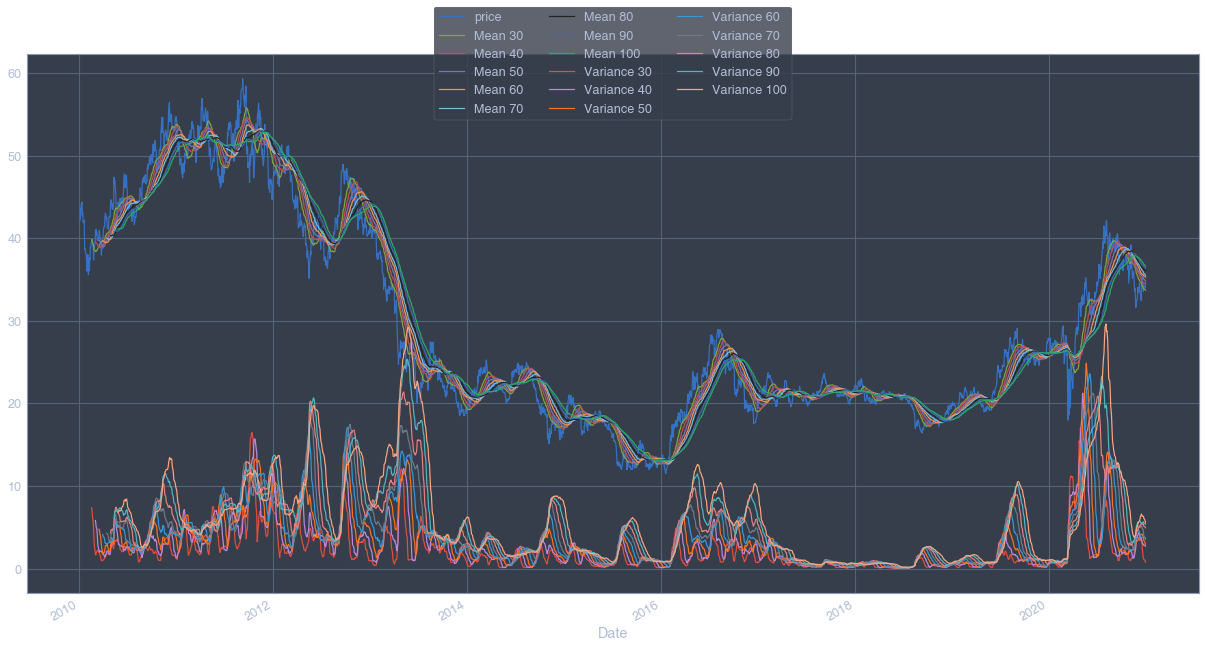

In [29]:
fig, ax = plt.subplots(1, figsize=(21, 11))

tickers['GDX'][['price']+mean_size+var_size].plot(ax=ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)

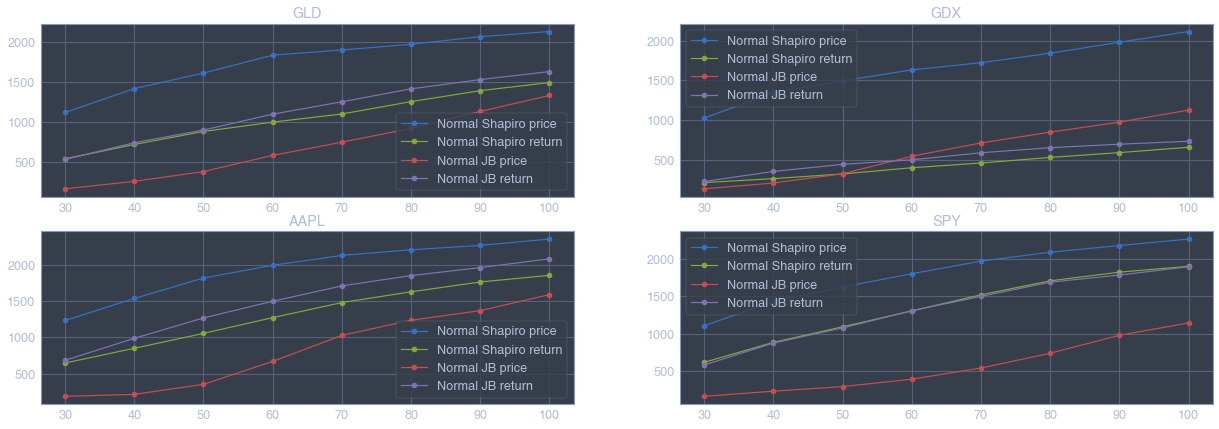

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(21, 7))

for ticker, coord in zip(tickers.keys(), [(i, j) for i in range(2) for j in range(2)]):
    axs[coord].plot(tickers[ticker].sum()[normal_shapiro_size].to_list(), 'o-', label='Normal Shapiro price')
    axs[coord].plot(tickers[ticker].sum()[normal_shapiro_return_size].to_list(), 'o-', label='Normal Shapiro return')
    axs[coord].plot(tickers[ticker].sum()[normal_jb_size].to_list(), 'o-', label='Normal JB price')
    axs[coord].plot(tickers[ticker].sum()[normal_jb_return_size].to_list(), 'o-', label='Normal JB return')
    axs[coord].set_xticks(axs[coord].get_xticks().tolist()[1:-1])
    axs[coord].set_xticklabels(x_ticks)
    axs[coord].set_title(ticker)
    axs[coord].legend()
    

In [8]:
def show_normal_for(ticker, test='shapiro'):
    if test=='shapiro':
        normal = normal_shapiro_size
        normal_return = normal_shapiro_return_size
    elif test=='jb':
        normal = normal_jb_size
        normal_return = normal_jb_return_size
    else:
        return ''
    
    for normal_price, normal_return in zip(normal, normal_return):
        fig, ax = plt.subplots(1, 2, figsize=(21, 7))
        ax[0].plot(tickers[ticker]['price'], c='g', label=ticker)
        ax_ = ax[0].twinx()
        tickers[ticker][normal_price].plot(kind='area', ax=ax_, color=['b'], alpha=0.5, label=normal_price)

        ax[1].plot(tickers[ticker]['return'], c='g', label=ticker)
        ax_ = ax[1].twinx()
        tickers[ticker][normal_return].plot(kind='area', ax=ax_, color=['b'], alpha=0.5, label=normal_return)

        ax[0].set_title(f'{ticker} normal price for {normal_price}({test})')
        ax[1].set_title(f'{ticker} normal return for {normal_return}({test})')
        ax[0].legend()
        ax[1].legend()
        

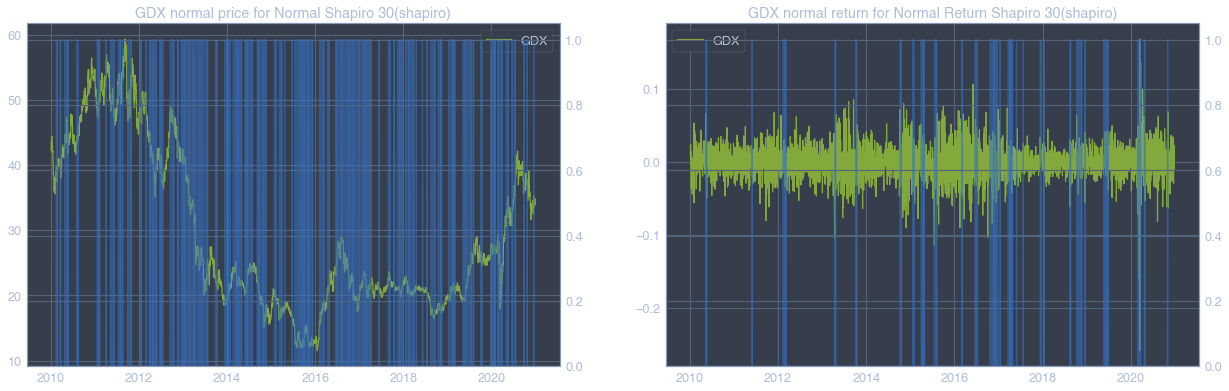

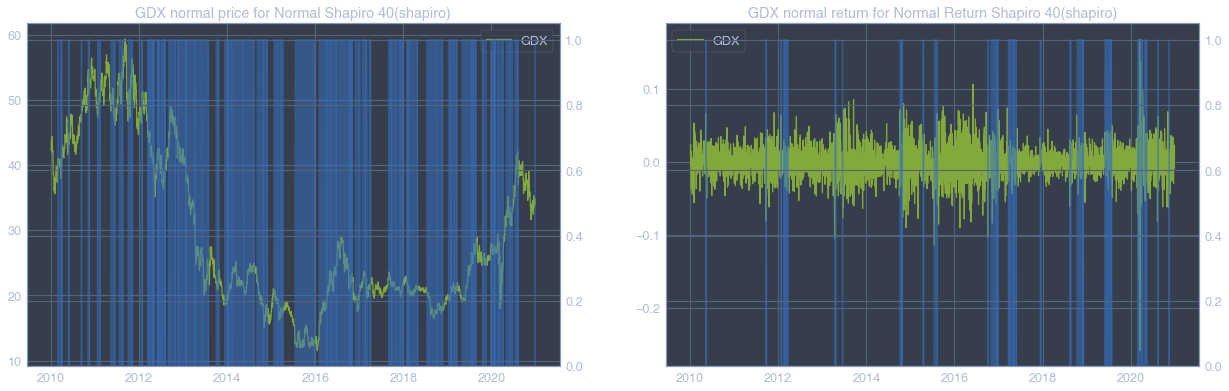

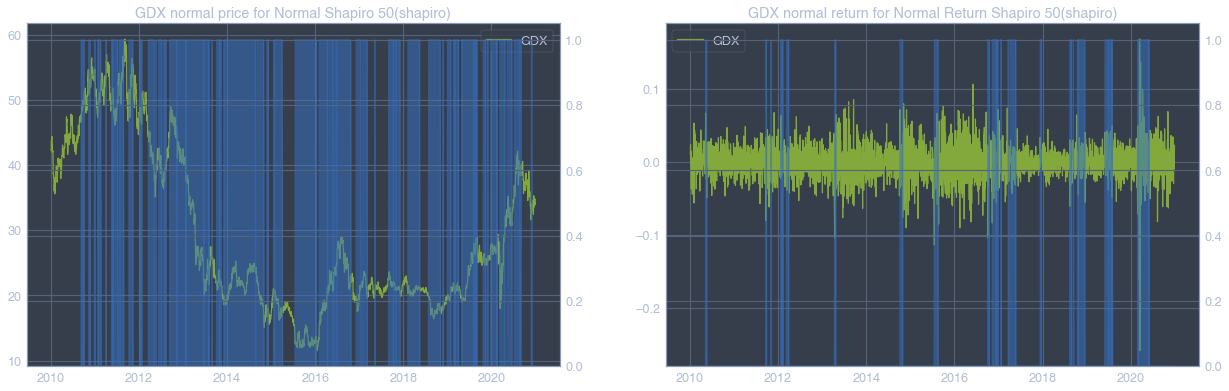

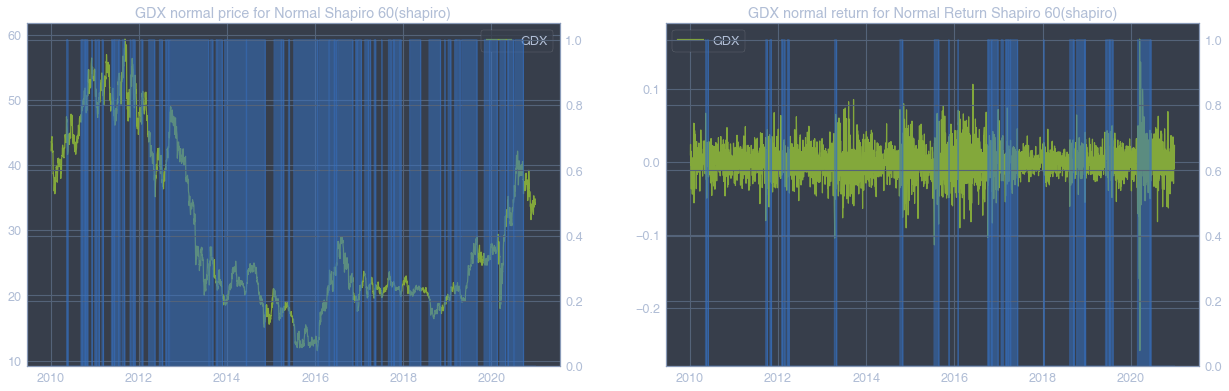

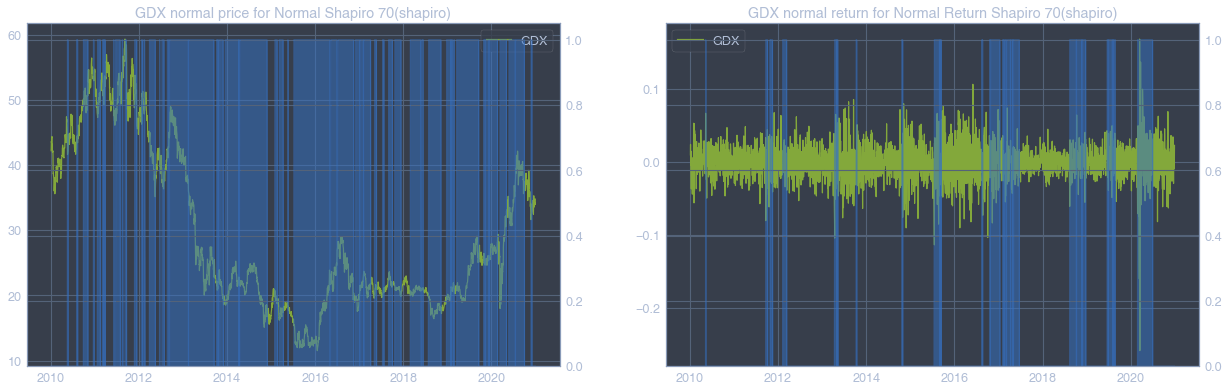

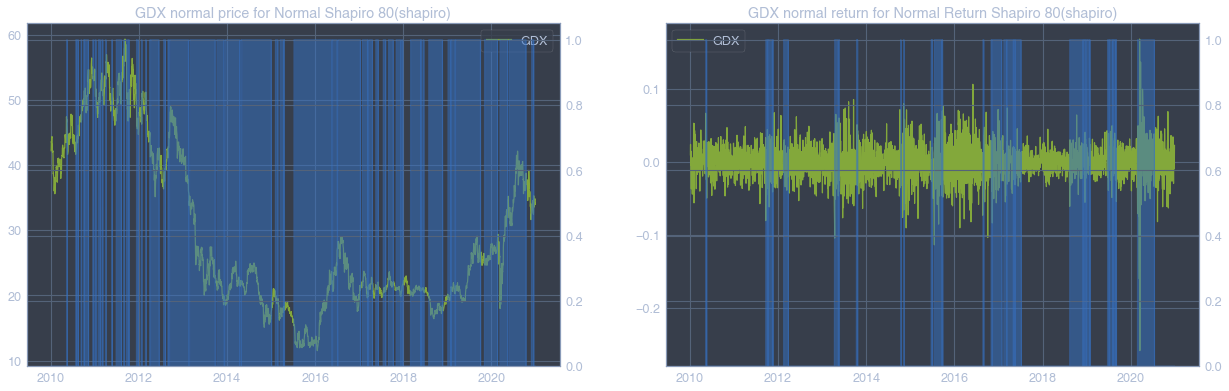

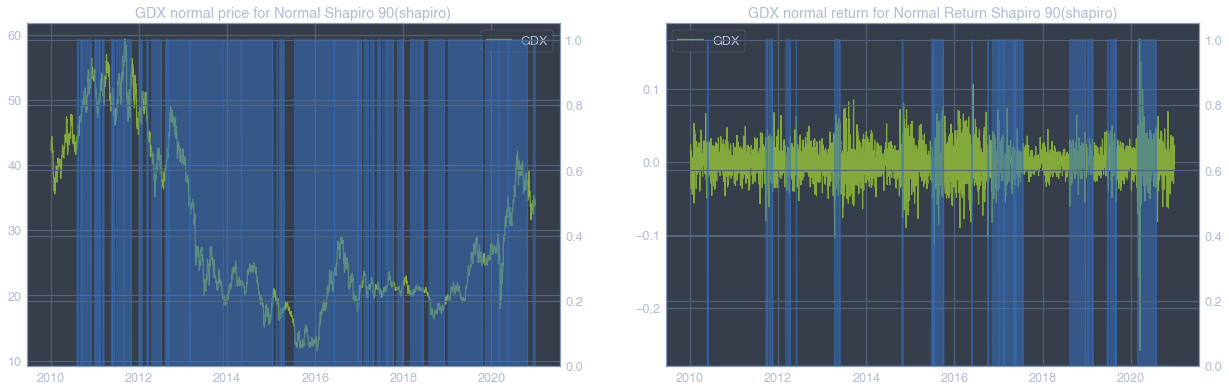

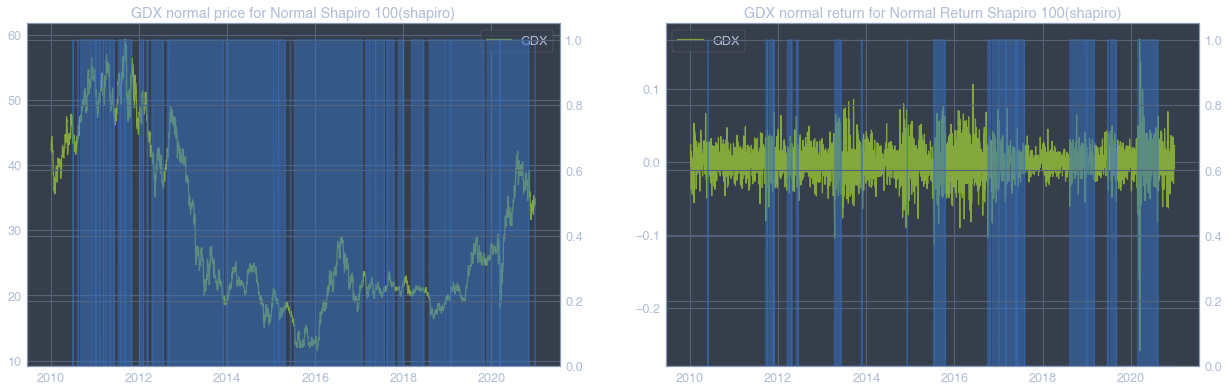

In [9]:
show_normal_for('GDX')

In [10]:
tickers['SPY'][normal_shapiro_return_size].sample(10)

,Normal Return Shapiro 30,Normal Return Shapiro 40,Normal Return Shapiro 50,Normal Return Shapiro 60,Normal Return Shapiro 70,Normal Return Shapiro 80,Normal Return Shapiro 90,Normal Return Shapiro 100
Date,,,,,,,,
2020-08-06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-05-10,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2015-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-05-24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2010-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016-09-27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2014-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-10-06,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [11]:
for ticker in tickers.keys():
    for sample in range(30, 110, 10):
        tickers[ticker][f'Normal cumsum JB {sample}'] = tickers[ticker][f'Normal JB {sample}'].cumsum()
        tickers[ticker][f'Normal Return cumsum JB {sample}'] = tickers[ticker][f'Normal Return JB {sample}'].cumsum()
        
        tickers[ticker][f'Normal cumsum Shapiro {sample}'] = tickers[ticker][f'Normal Shapiro {sample}'].cumsum()
        tickers[ticker][f'Normal Return cumsum Shapiro {sample}'] = tickers[ticker][f'Normal Return Shapiro {sample}'].cumsum()

tickers['SPY'].sample(10)

,price,return,Normal JB 30,Normal Shapiro 30,Mean 30,Variance 30,Normal Return JB 30,Normal Return Shapiro 30,Mean Return 30,Variance Return 30,...,Normal cumsum Shapiro 80,Normal Return cumsum Shapiro 80,Normal cumsum JB 90,Normal Return cumsum JB 90,Normal cumsum Shapiro 90,Normal Return cumsum Shapiro 90,Normal cumsum JB 100,Normal Return cumsum JB 100,Normal cumsum Shapiro 100,Normal Return cumsum Shapiro 100
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-20,239.822952,-0.008516,0.0,0.0,240.081673,26.985438,0.0,0.0,-0.000790,0.000166,...,1626.0,1131.0,835.0,1166.0,1699.0,1210.0,953.0,1259.0,1719.0,1276.0
2020-01-27,300.934143,-0.016159,0.0,0.0,301.402911,20.040197,1.0,0.0,0.001112,0.000032,...,1930.0,1475.0,915.0,1550.0,2010.0,1589.0,1058.0,1661.0,2062.0,1667.0
2015-08-10,179.166321,0.012520,0.0,0.0,177.880963,3.746149,0.0,0.0,0.000119,0.000064,...,1011.0,644.0,358.0,677.0,1071.0,716.0,471.0,747.0,1071.0,770.0
2011-08-22,88.360710,0.000799,0.0,1.0,97.880270,37.347247,0.0,1.0,-0.005253,0.000576,...,225.0,203.0,58.0,161.0,232.0,232.0,91.0,189.0,235.0,251.0
2013-11-20,146.766724,-0.003133,0.0,0.0,144.415080,5.613406,0.0,0.0,0.002495,0.000046,...,647.0,432.0,152.0,483.0,687.0,498.0,216.0,527.0,682.0,547.0
2011-01-13,99.690269,-0.001635,0.0,0.0,97.220523,2.332906,0.0,0.0,0.002143,0.000016,...,121.0,99.0,22.0,68.0,129.0,112.0,33.0,88.0,130.0,122.0
2013-09-18,141.619263,0.011508,0.0,0.0,136.868880,4.221030,0.0,0.0,0.000646,0.000042,...,608.0,425.0,145.0,459.0,650.0,496.0,216.0,501.0,656.0,535.0
2010-08-25,81.405266,0.003878,0.0,0.0,84.268604,2.971031,0.0,0.0,-0.001147,0.000138,...,79.0,56.0,15.0,44.0,74.0,54.0,19.0,45.0,64.0,59.0
2013-01-18,120.215546,0.002227,0.0,1.0,116.815436,4.081735,1.0,0.0,0.001807,0.000058,...,482.0,322.0,126.0,293.0,511.0,369.0,171.0,334.0,514.0,405.0


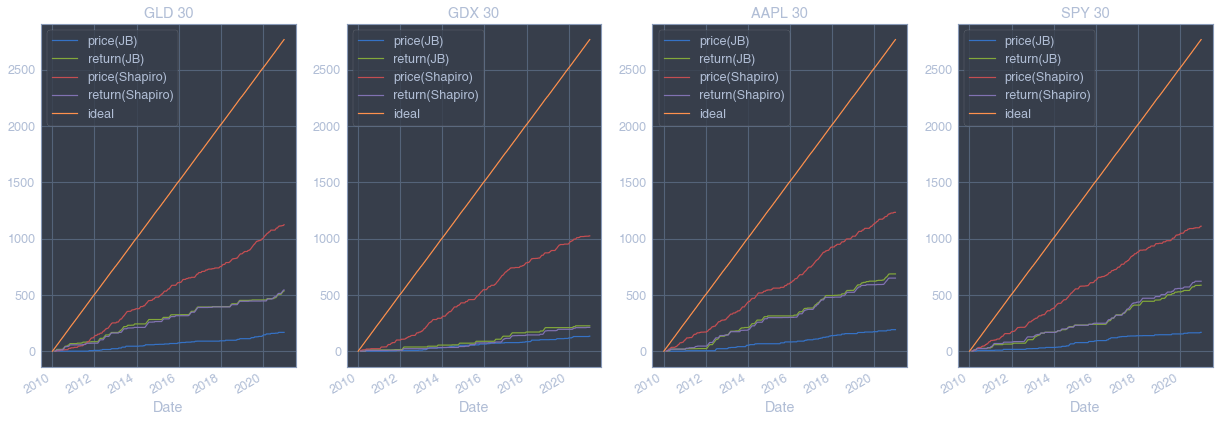

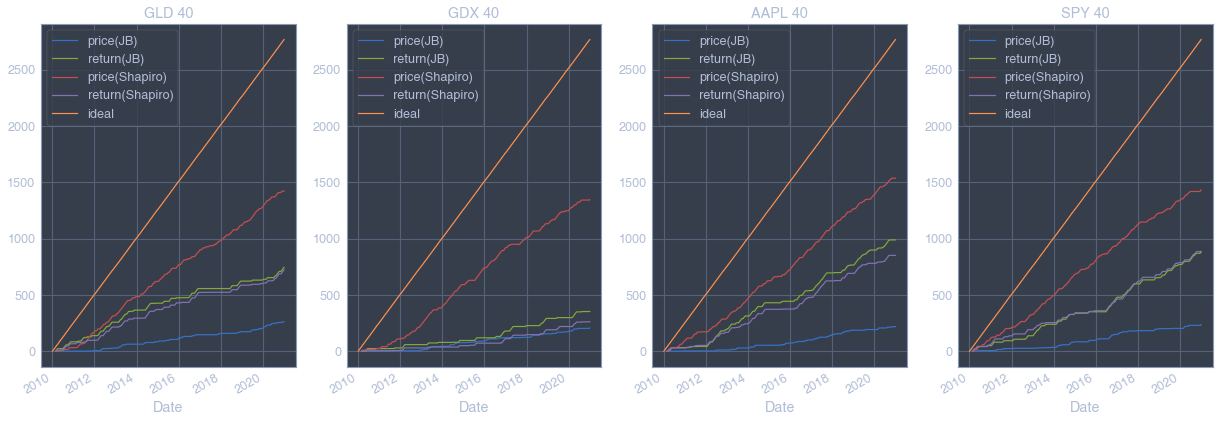

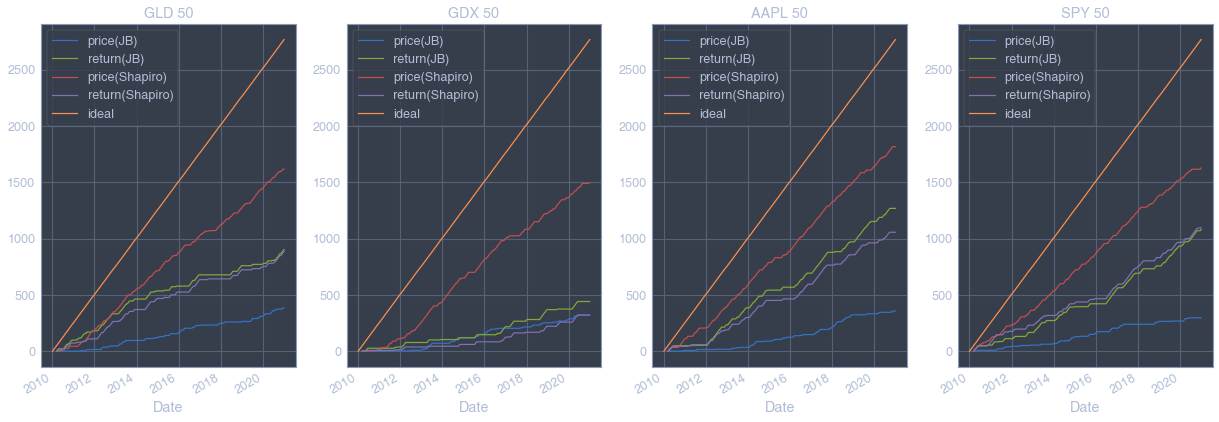

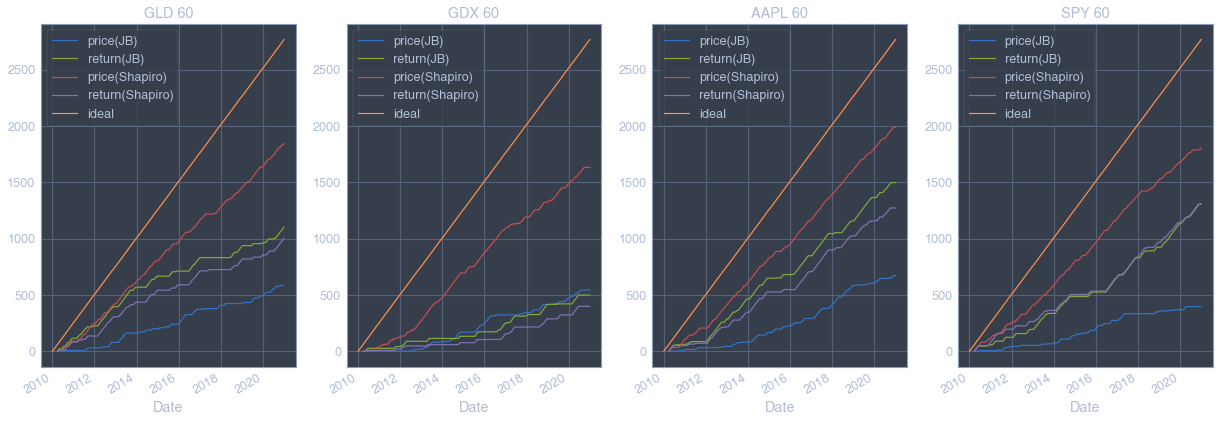

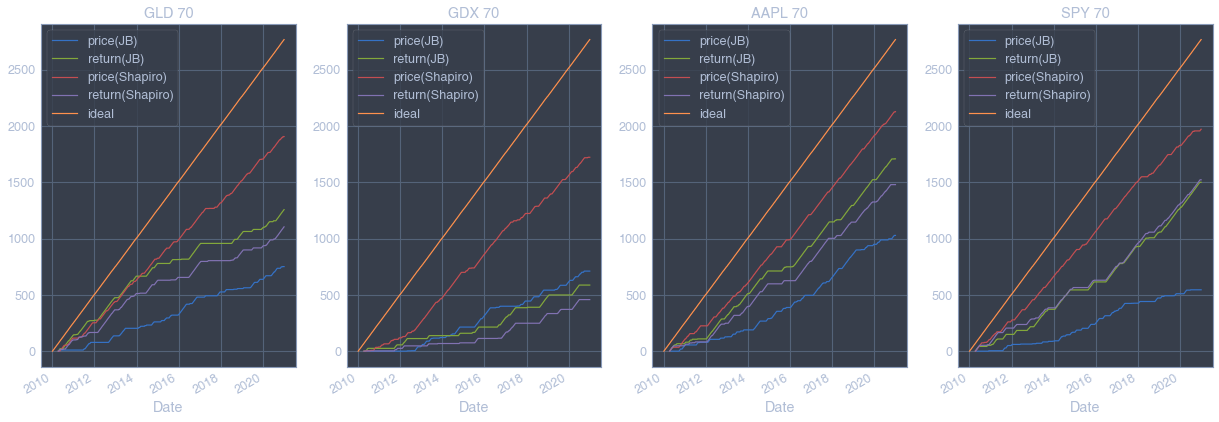

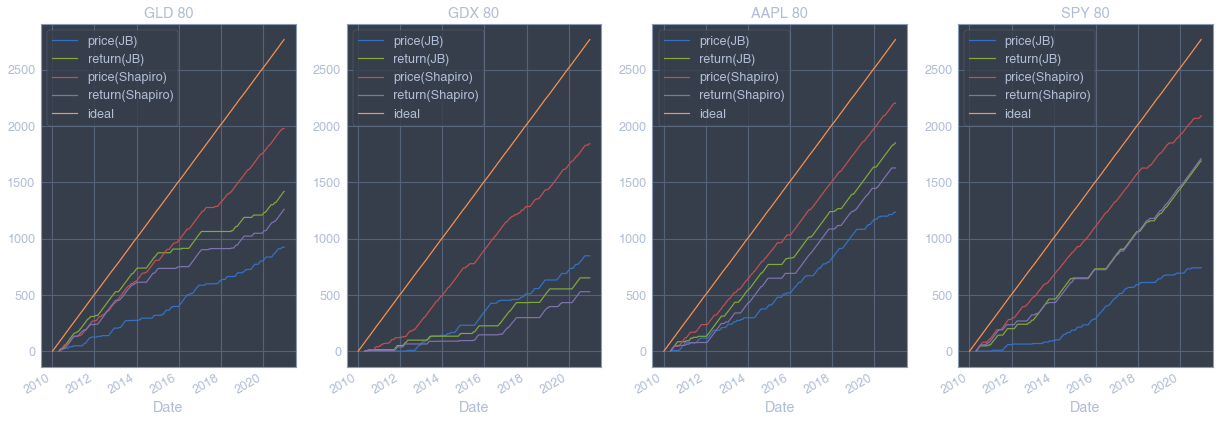

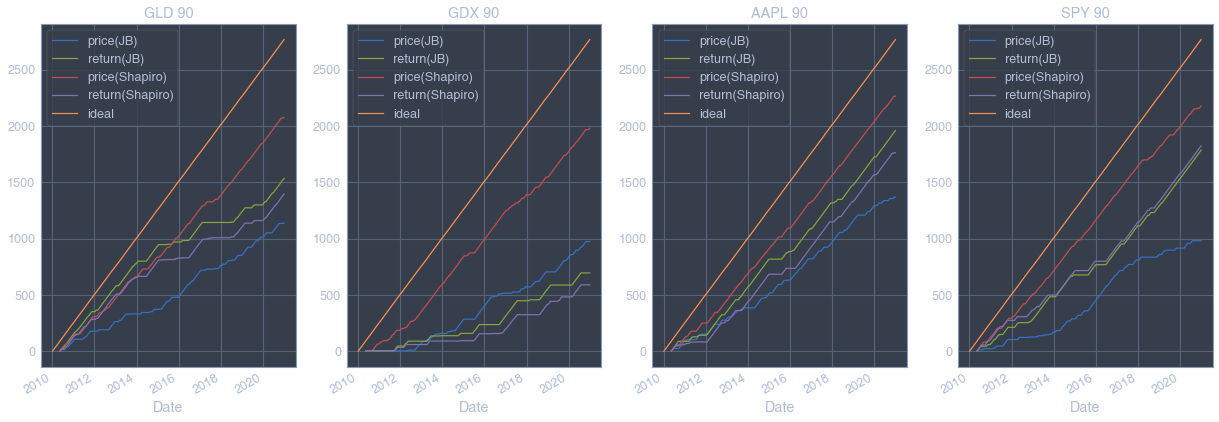

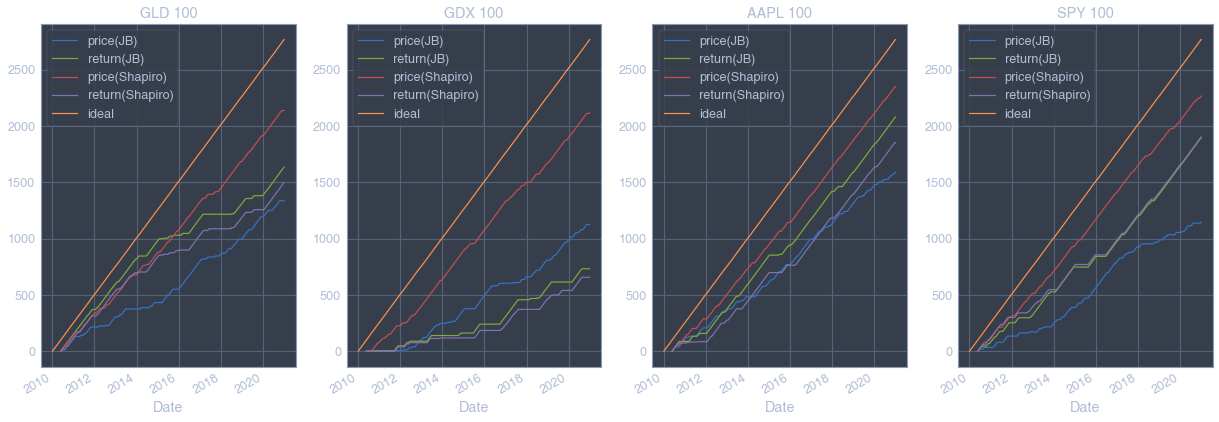

In [12]:
for sample in range(30, 110, 10):
    fig, axs = plt.subplots(1, 4, figsize=(21, 7))
    for i, ticker in enumerate(tickers.keys()):
        tickers[ticker][f'Normal cumsum JB {sample}'].plot(ax=axs[i], label='price(JB)')
        tickers[ticker][f'Normal Return cumsum JB {sample}'].plot(ax=axs[i], label='return(JB)')
        tickers[ticker][f'Normal cumsum Shapiro {sample}'].plot(ax=axs[i], label='price(Shapiro)')
        tickers[ticker][f'Normal Return cumsum Shapiro {sample}'].plot(ax=axs[i], label='return(Shapiro)')
        axs[i].plot(tickers[ticker].index, np.arange(len(tickers[ticker].index)), label='ideal')
        axs[i].set_title(ticker + ' ' + str(sample))
        axs[i].legend()

In [14]:
tickers['AAPL'][normal_jb_size].tail()

,Normal JB 30,Normal JB 40,Normal JB 50,Normal JB 60,Normal JB 70,Normal JB 80,Normal JB 90,Normal JB 100
Date,,,,,,,,
2020-12-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2020-12-29,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2020-12-30,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


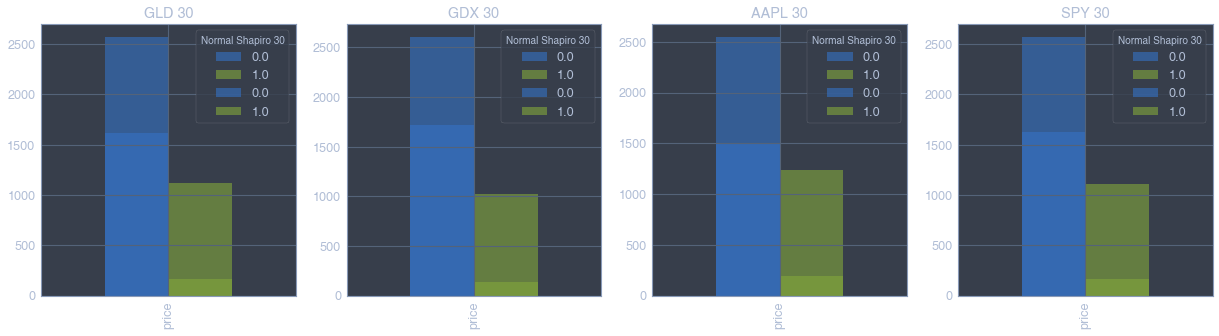

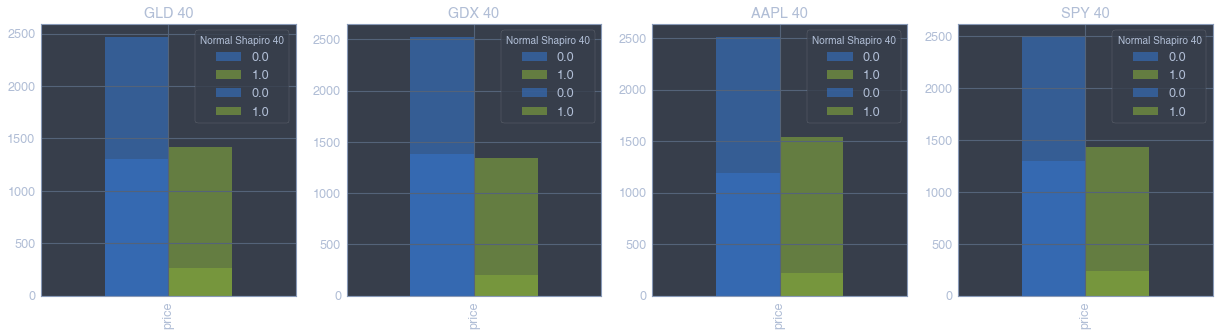

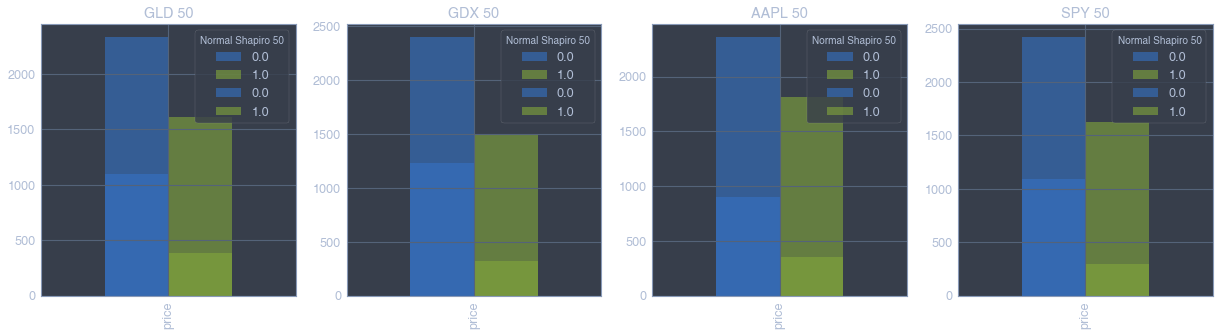

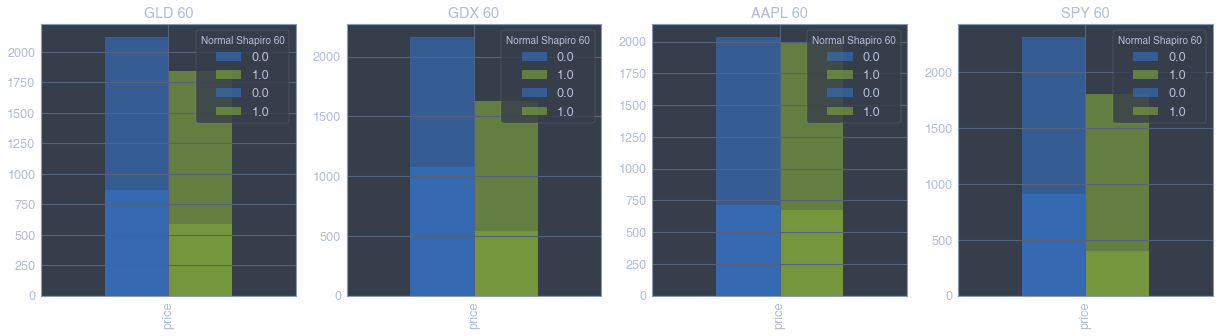

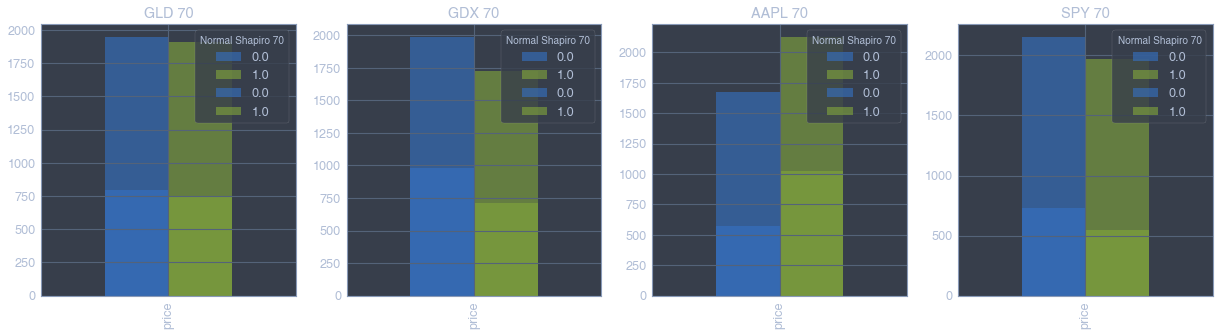

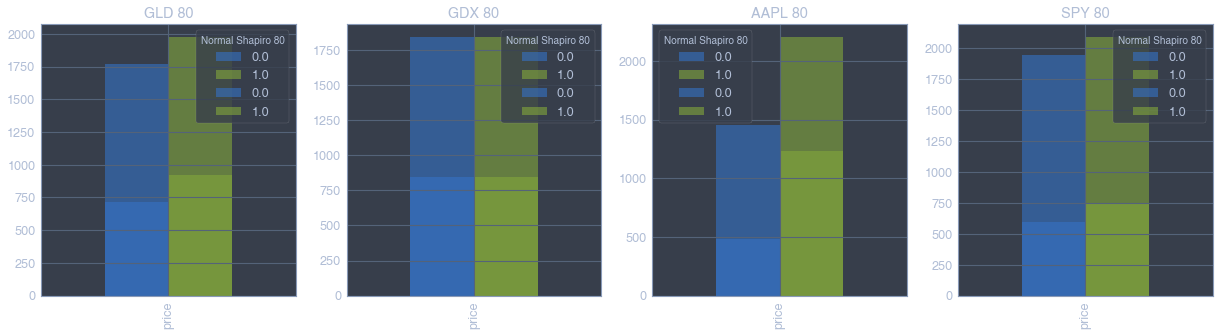

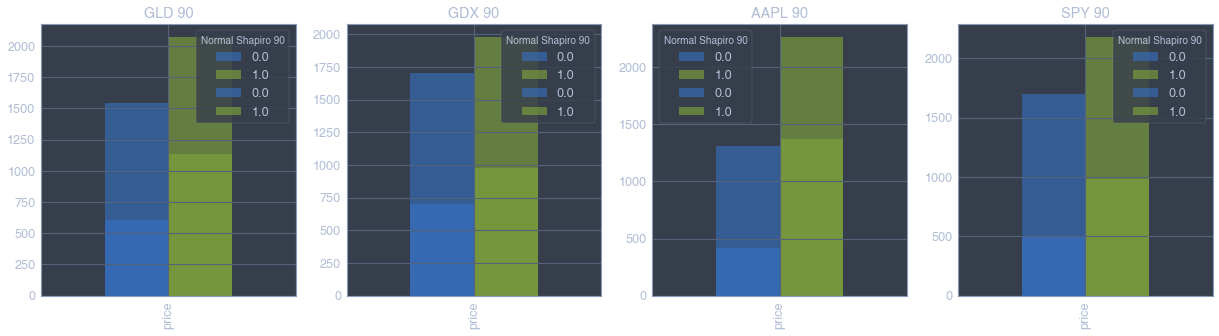

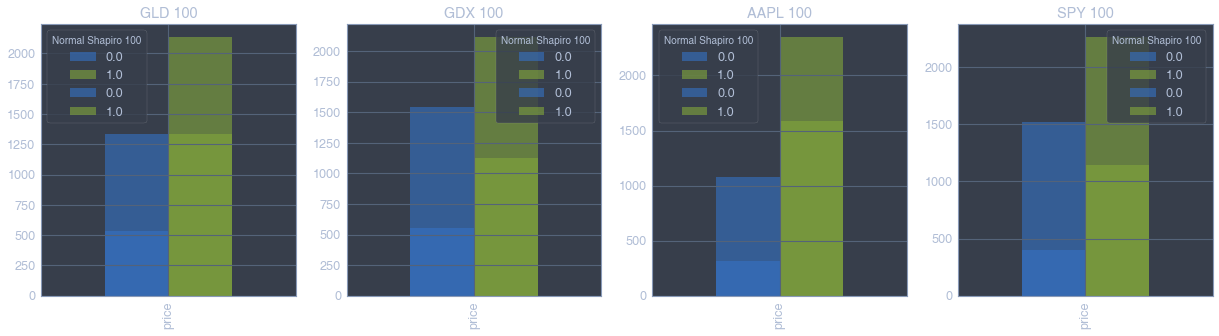

In [25]:
for sample in range(30, 110, 10):
    fig, axs = plt.subplots(1, 4, figsize=(21, 5))
    for i, ticker in enumerate(tickers.keys()):
        tickers[ticker].groupby(f'Normal JB {sample}').count()['price'].to_frame().T.plot(kind='bar', ax=axs[i], alpha=.6)
        tickers[ticker].groupby(f'Normal Shapiro {sample}').count()['price'].to_frame().T.plot(kind='bar', ax=axs[i], alpha=.6)
        axs[i].set_title(f'{ticker} {sample}')

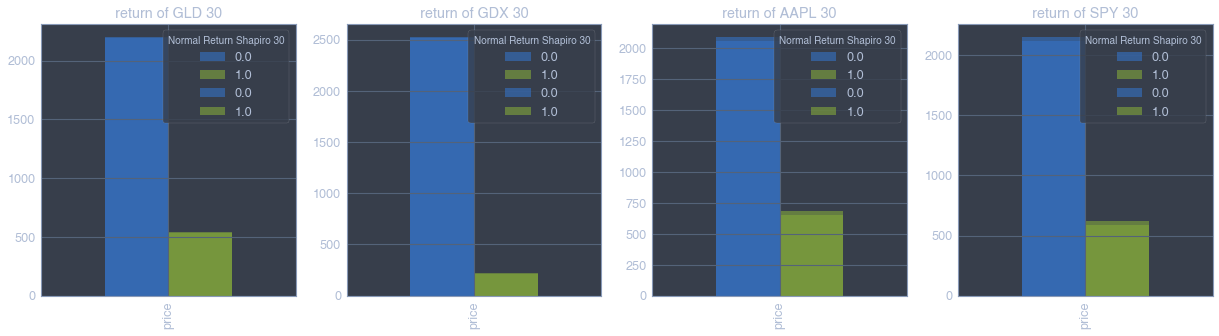

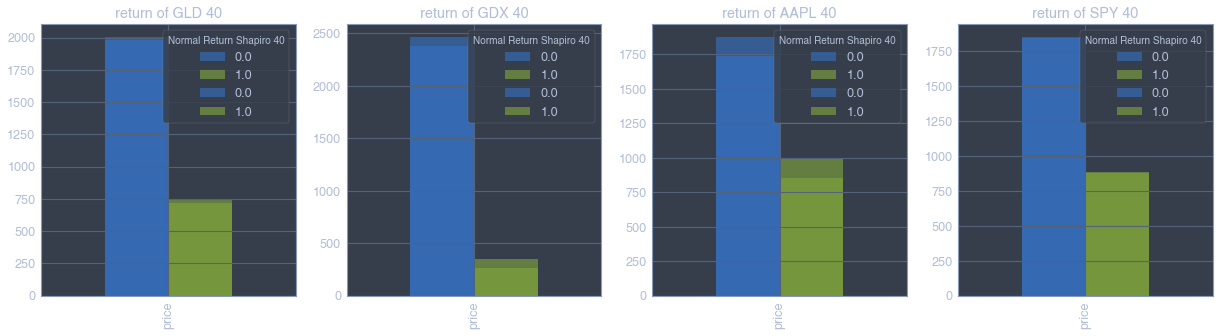

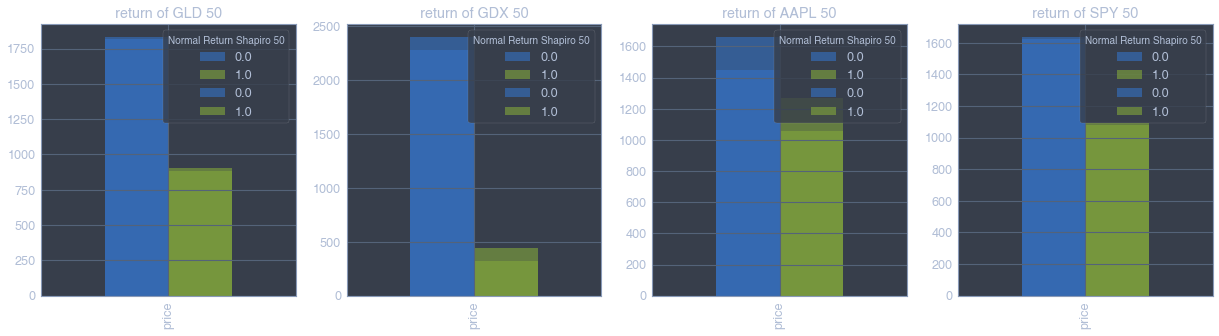

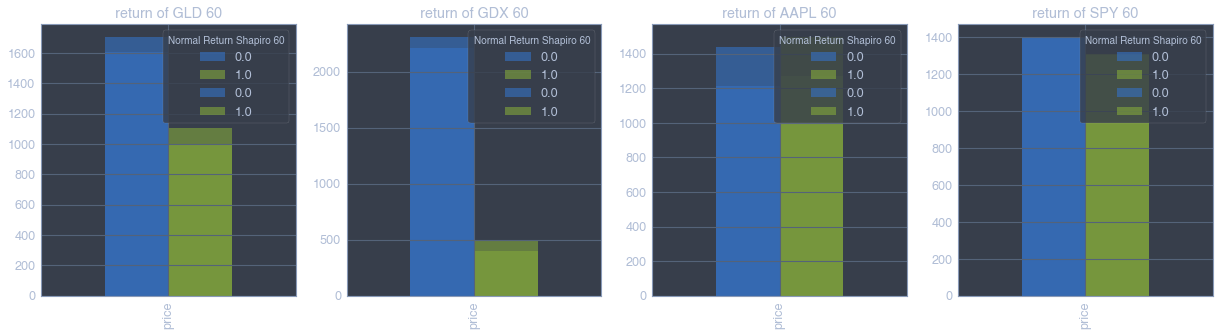

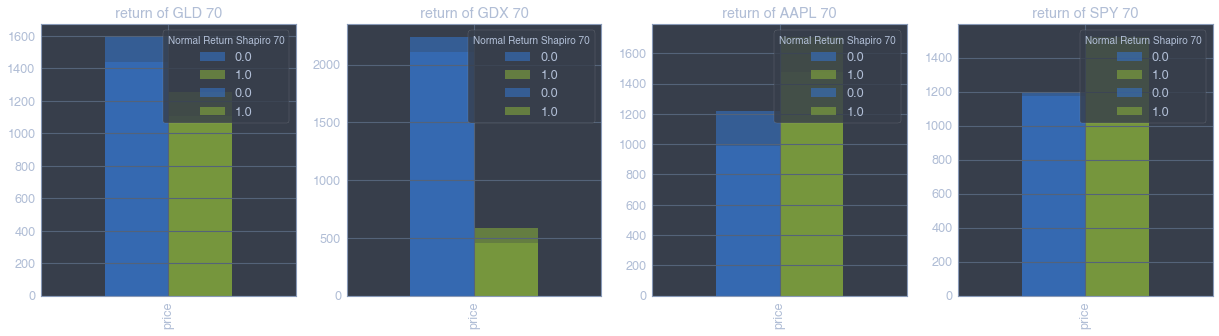

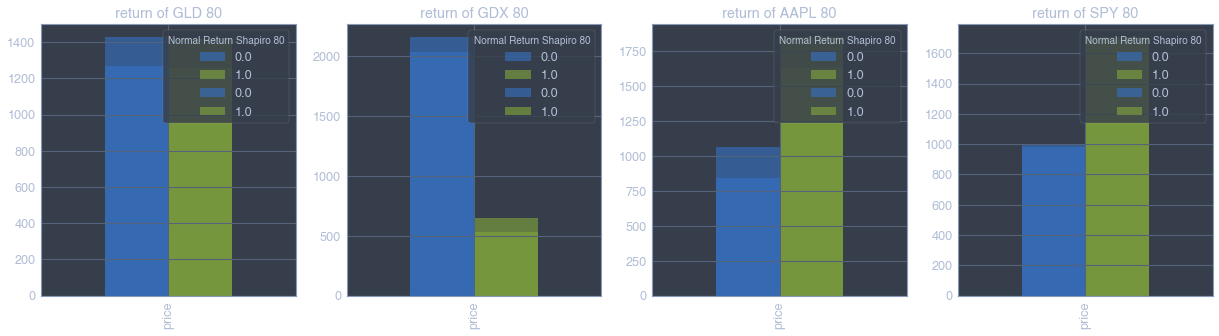

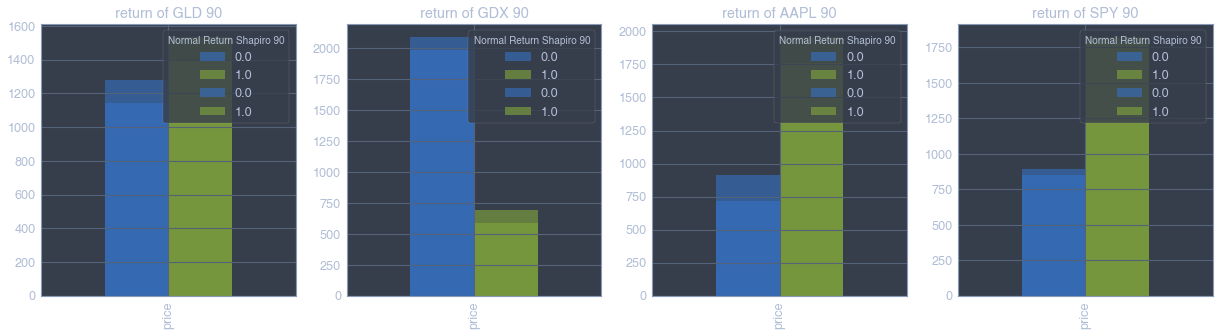

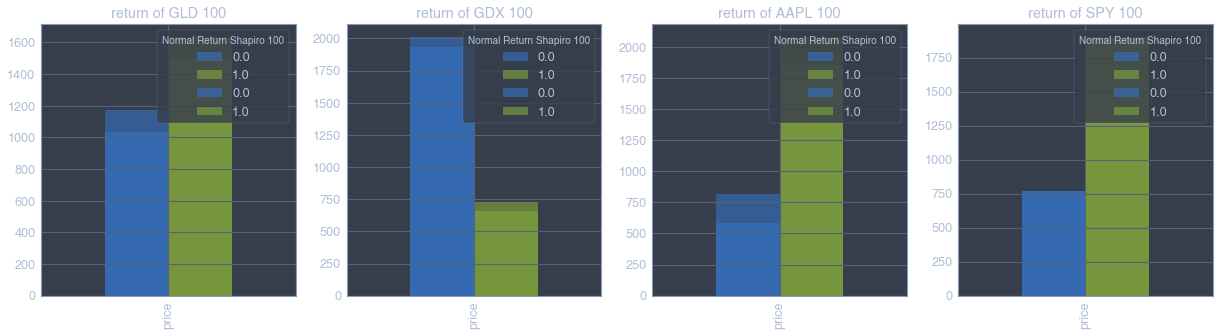

In [26]:
for sample in range(30, 110, 10):
    fig, axs = plt.subplots(1, 4, figsize=(21, 5))
    for i, ticker in enumerate(tickers.keys()):
        tickers[ticker].groupby(f'Normal Return JB {sample}').count()['price'].to_frame().T.plot(kind='bar', ax=axs[i], alpha=.6)
        tickers[ticker].groupby(f'Normal Return Shapiro {sample}').count()['price'].to_frame().T.plot(kind='bar', ax=axs[i], alpha=.6)
        axs[i].set_title(f'return of {ticker} {sample}')

In [49]:
for ticker, data in tickers.items():
    data['trend'] = np.sign(data['return'])

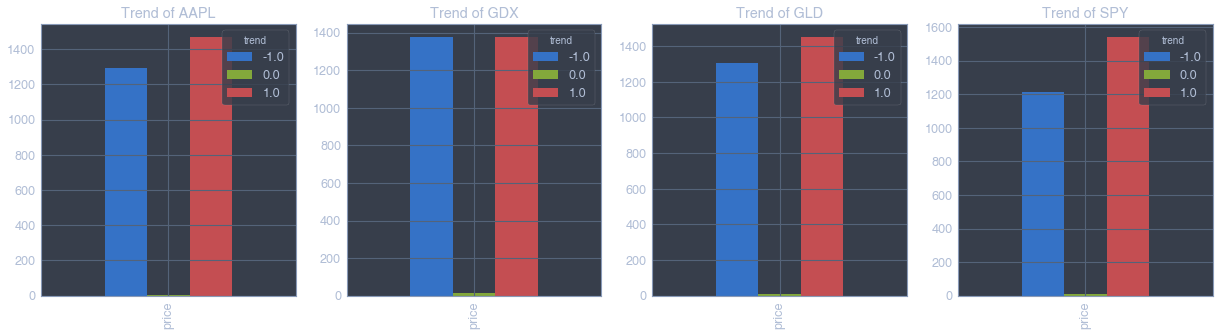

In [50]:
fig, axs = plt.subplots(1, 4, figsize=(21, 5))
for i, ticker in enumerate(tickers.keys()):
    tickers[ticker].groupby('trend').count()['price'].to_frame().T.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Trend of {ticker}')

In [19]:
def show_normal_place_for(ticker):
    for normal_price, normal_return in zip(normal_size, normal_return_size):
        normal_price_and_return = tickers[ticker][
            (tickers[ticker][normal_price]==1)
            & ((tickers[ticker][normal_return]==1))
        ]['price']

        fig, ax = plt.subplots(1, figsize=(21, 5))
        tickers[ticker]['price'].plot(ax=ax)
        ax.scatter(normal_price_and_return.index, normal_price_and_return, c='g')
        ax.set_title(f'Place with normal price and return for {ticker} with normal size {normal_price[7:]}')
    

In [10]:
tickers.keys()

dict_keys(['AAPL', 'GDX', 'GLD', 'SPY'])

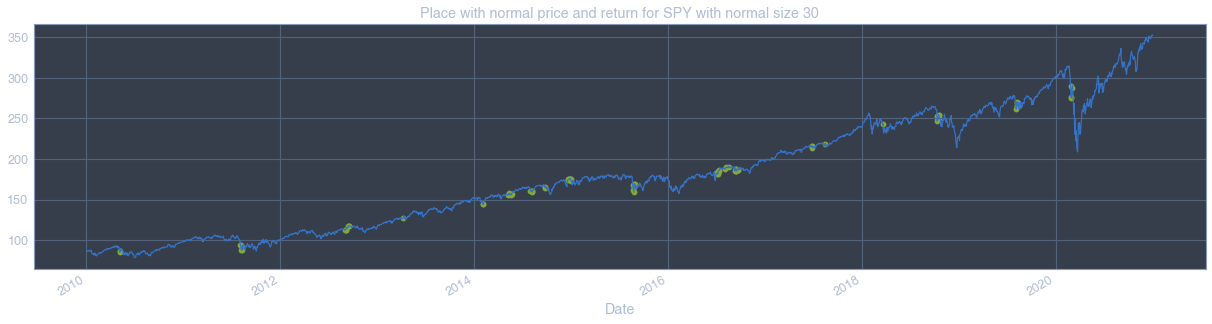

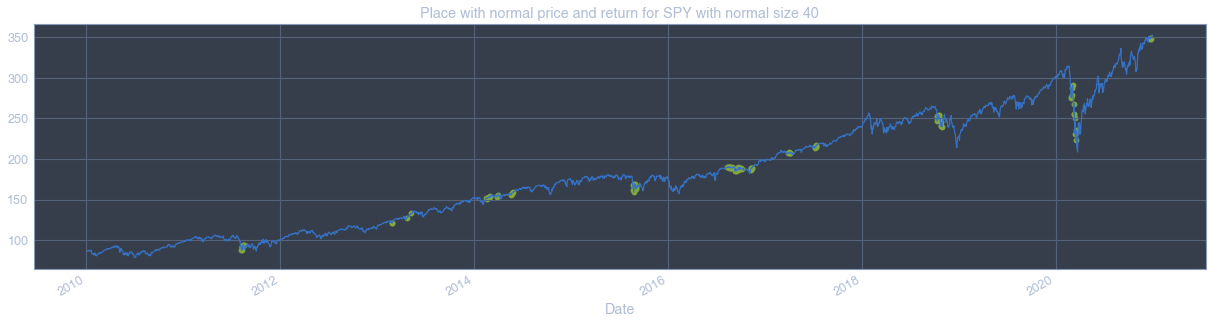

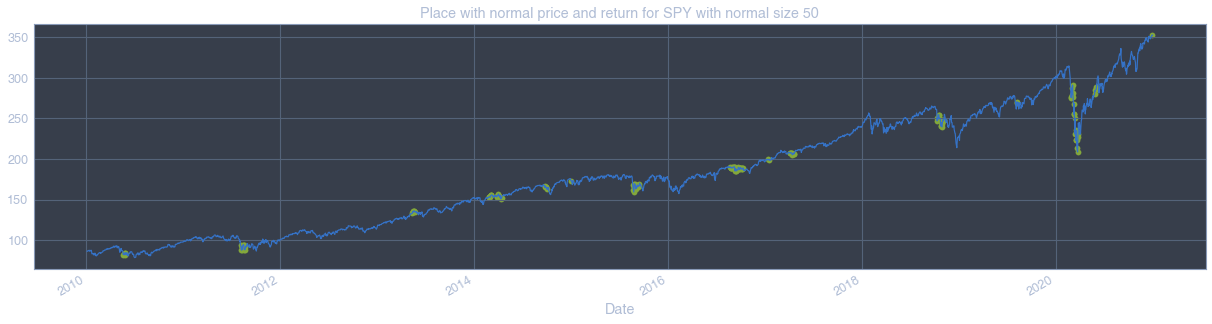

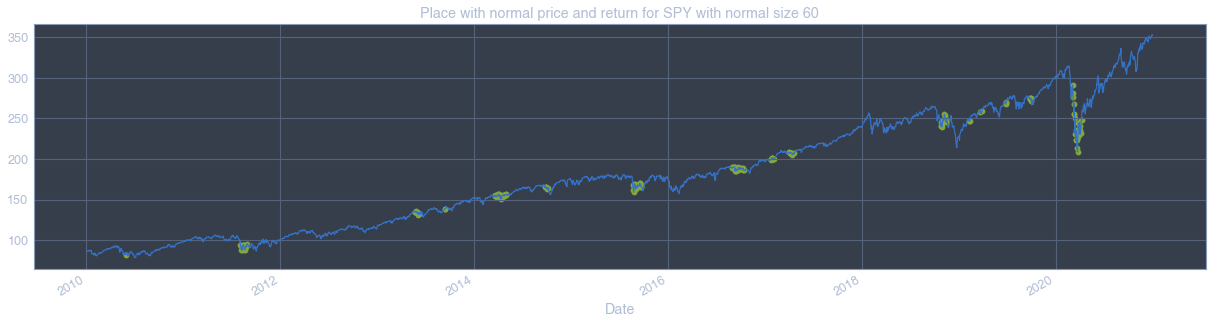

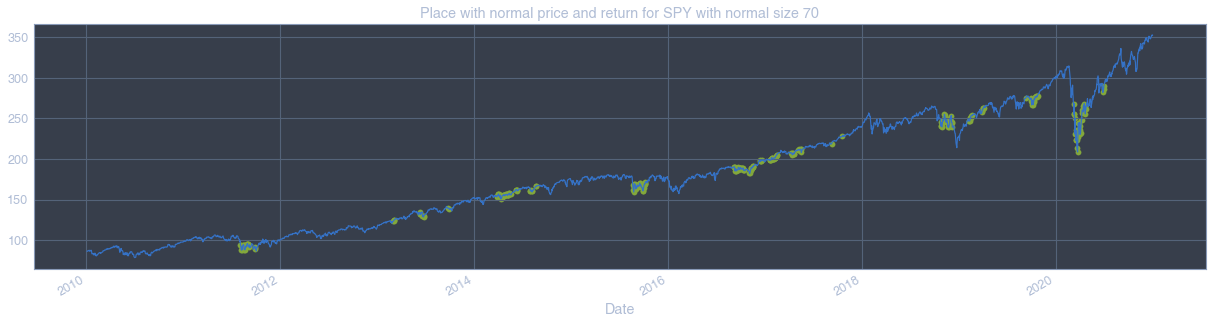

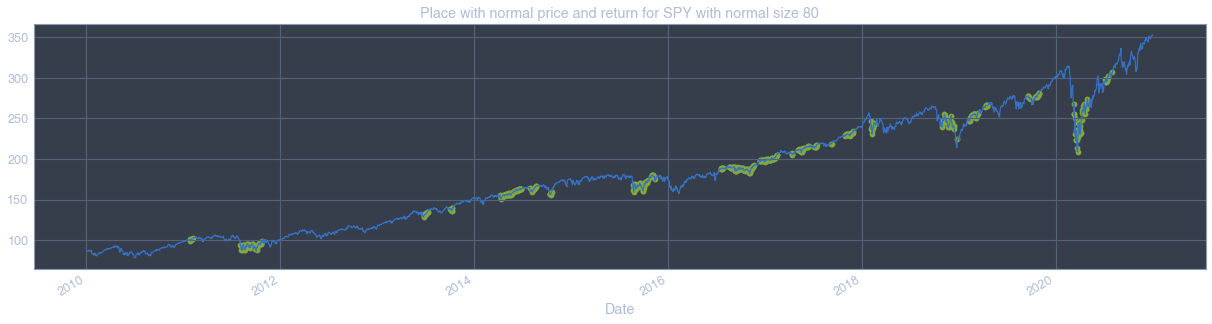

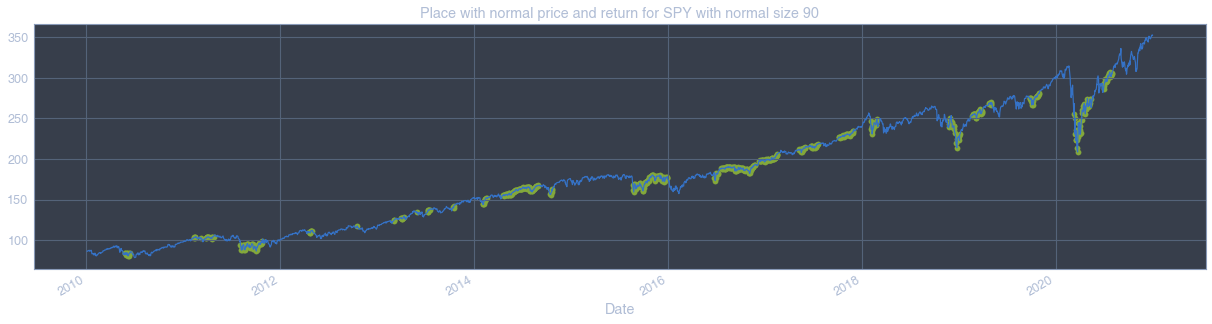

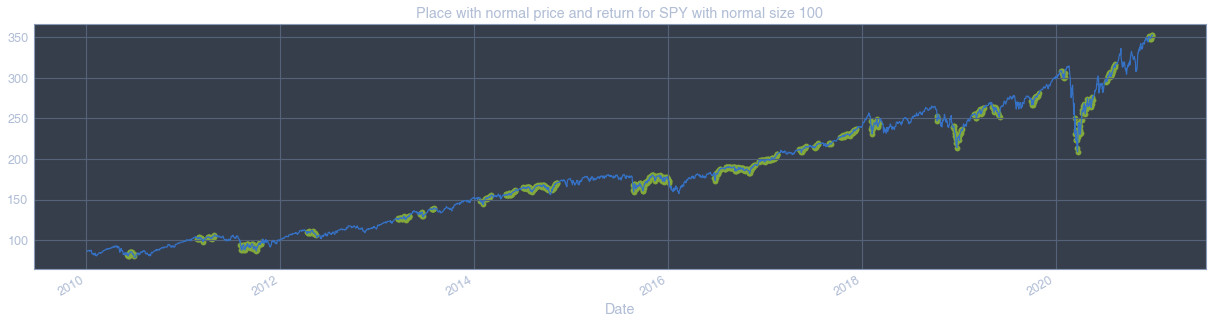

In [20]:
show_normal_place_for('SPY')

## Review of Normal Intervals

In [7]:
aapl = tickers['AAPL']
aapl.sample(10)

,price,return,Normal,Normal Return,Normal cumsum,Normal Return cumsum
Date,,,,,,
2014-10-06,22.113331,0.000000,0.0,1.0,575.0,789.0
2014-08-15,21.749283,0.004911,1.0,1.0,559.0,754.0
2020-11-27,114.133553,0.004815,1.0,1.0,1571.0,2058.0
2015-01-28,25.707136,0.054993,1.0,0.0,632.0,853.0
2014-10-21,22.745964,0.026803,1.0,1.0,581.0,800.0
2010-05-12,7.904591,0.021481,NaN,NaN,NaN,NaN
2010-04-06,7.224487,0.004393,NaN,NaN,NaN,NaN
2018-12-26,37.570808,0.068053,1.0,0.0,1309.0,1587.0
2016-09-22,26.431215,0.009379,1.0,1.0,937.0,1107.0


In [57]:
aapl.shape

(2768, 4)

In [ ]:
def get_interval(ticker, date):
    start = tickers[ticker].index.get_loc(date)-99
    end = tickers[ticker].index.get_loc(date)+1
    return tickers[ticker].iloc[start:end]

In [8]:
normal = aapl[aapl['Normal']==1].index
normal_return =  aapl[aapl['Normal Return']==1].index
normal.shape, normal_return.shape

((1588,), (2080,))

In [21]:
normal_intervals = []
for n in normal:
    normal_intervals.append(get_interval('AAPL', n))

In [22]:
normal_return_intervals = []
for n in normal_return:
    normal_return_intervals.append(get_interval('AAPL', n))

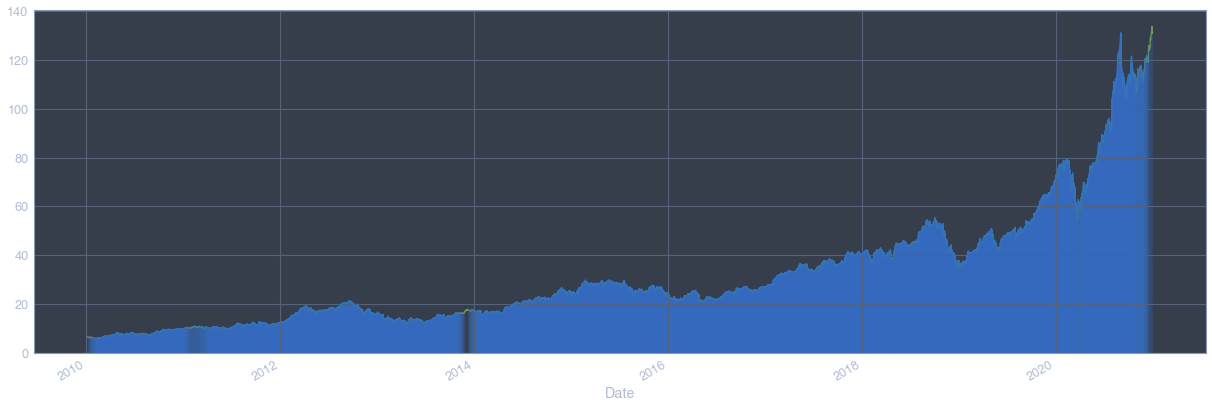

In [56]:
fig, ax = plt.subplots(1, figsize=(21, 7))

ax.plot(aapl['price'], c='g')
for i in normal_intervals:
    i['price'].plot(kind='area', ax=ax, color=['b'], alpha=0.1)

Text(0.5, 1.0, 'AAPL. not normal intervals')

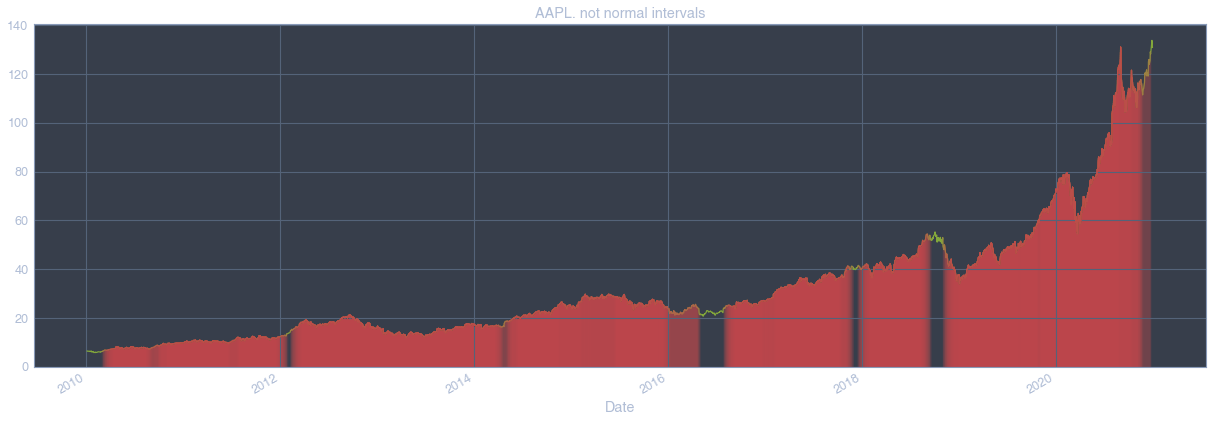

In [59]:
not_normal = aapl[aapl['Normal']==0].index

not_normal_intervals = []
for n in not_normal:
    not_normal_intervals.append(get_interval('AAPL', n))

fig, ax = plt.subplots(1, figsize=(21, 7))

ax.plot(aapl['price'], c='g')
for i in not_normal_intervals:
    i['price'].plot(kind='area', ax=ax, color=['r'], alpha=0.1)
ax.set_title('AAPL. not normal intervals')

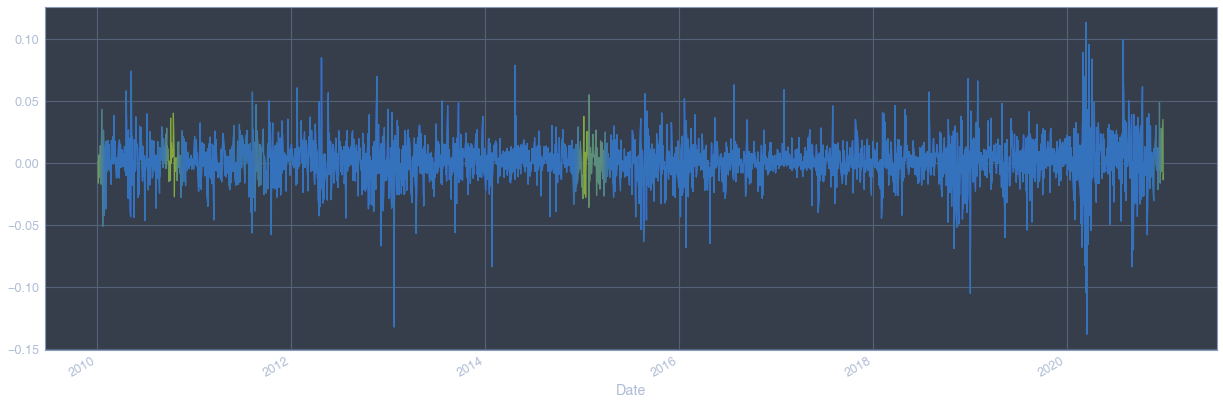

In [25]:
fig, ax = plt.subplots(1, figsize=(21, 7))

ax.plot(aapl['return'], c='g')
for i in normal_return_intervals:
    i['return'].plot(ax=ax, color=['b'], alpha=0.1)
ax.set_title('AAPL. normal intervals')

Text(0.5, 1.0, 'AAPL. not normal intervals')

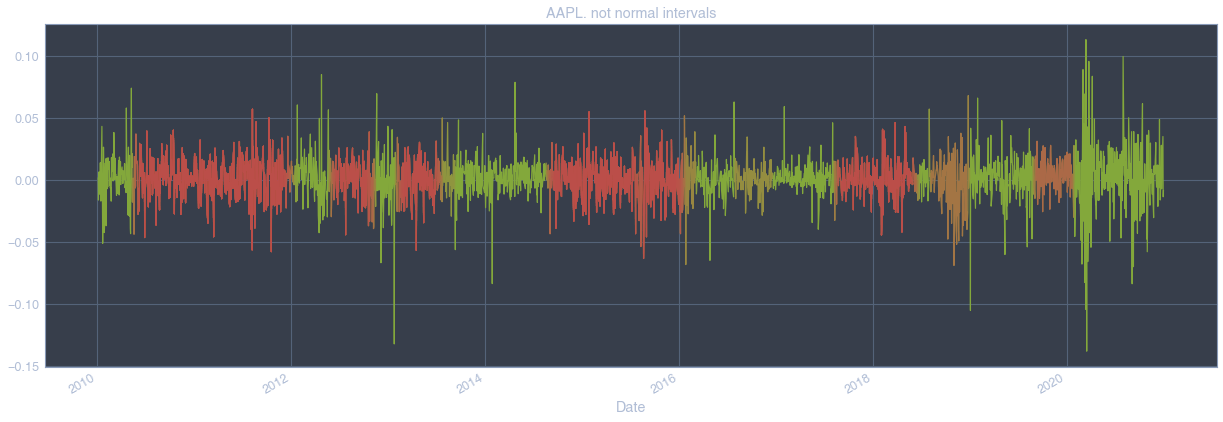

In [27]:
not_normal = aapl[aapl['Normal Return']==0].index

not_normal_reutrn_intervals = []
for n in not_normal:
    not_normal_reutrn_intervals.append(get_interval('AAPL', n))

fig, ax = plt.subplots(1, figsize=(21, 7))

ax.plot(aapl['return'], c='g')
for i in not_normal_reutrn_intervals:
    i['return'].plot(ax=ax, color=['r'], alpha=0.1)
ax.set_title('AAPL. not normal intervals')

In [13]:
# AAPL
len(normal_intervals), len(normal_return_intervals)

(1588, 2080)

In [23]:
normal_intervals[0].tail()

,price,return,Normal,Normal Return,Normal cumsum,Normal Return cumsum,trend
Date,,,,,,,
2010-05-20,7.170802,-0.043537,NaN,NaN,NaN,NaN,-1.0
2010-05-21,7.308330,0.018997,NaN,NaN,NaN,NaN,1.0
2010-05-24,7.442242,0.018157,NaN,NaN,NaN,NaN,1.0
2010-05-25,7.395792,-0.006261,NaN,NaN,NaN,NaN,-1.0
2010-05-26,7.362315,-0.004537,1.0,NaN,1.0,NaN,-1.0


In [24]:
normal_return_intervals[0].tail()

,price,return,Normal,Normal Return,Normal cumsum,Normal Return cumsum,trend
Date,,,,,,,
2010-05-21,7.308330,0.018997,NaN,NaN,NaN,NaN,1.0
2010-05-24,7.442242,0.018157,NaN,NaN,NaN,NaN,1.0
2010-05-25,7.395792,-0.006261,NaN,NaN,NaN,NaN,-1.0
2010-05-26,7.362315,-0.004537,1.0,NaN,1.0,NaN,-1.0
2010-05-27,7.640992,0.037153,1.0,1.0,2.0,1.0,1.0


In [46]:
pos = []
neg = []
for n in normal_intervals:
    result = n.groupby('trend').count()['price'].values
    neg.append(result[0])
    pos.append(result[1])

print(f'Negative trend mean: {np.mean(neg)}')
print(f'Positive trend mean: {np.mean(pos)}')

Negative trend mean: 46.57367758186398
Positive trend mean: 44.41183879093199


In [48]:
pos = []
neg = []
for n in normal_return_intervals:
    result = n.groupby('trend').count()['price'].values
    neg.append(result[0])
    pos.append(result[1])

print(f'Negative trend mean: {np.mean(neg)}')
print(f'Positive trend mean: {np.mean(pos)}')

Negative trend mean: 46.6375
Positive trend mean: 45.129326923076924
